# Probabilistic Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from volumetricspy import ProbVar, MonteCarlo

## Constant Values

In [2]:
x = ProbVar(name='test1',constant=5.)
x.get_sample()

5.0

<AxesSubplot:ylabel='Count'>

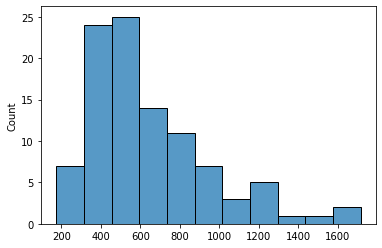

In [3]:
y = ProbVar(
    name = 'test',
    dist = 'lognorm', 
    kw = {'s':0.42, 'scale':500})

sns.histplot(y.get_sample(size=100))

In [4]:
def ooip(a,h,bo,phi,sw):
    return 7758*a*h*phi*(1-sw)*(1/bo)*(1/1000000)

In [5]:
a = ProbVar(name = 'area',dist='norm',kw={'loc':1000,'scale':200})
h = ProbVar(name = 'height',dist='uniform',kw={'loc':180,'scale':70})
bo = ProbVar(name = 'bo',constant=1.12)
phi = ProbVar(name = 'phi',dist='norm',kw={'loc':0.18,'scale':0.04})
sw = ProbVar(name = 'sw',dist='norm',kw={'loc':0.4,'scale':0.1})

In [6]:
OOIP = MonteCarlo(
    name = 'OOIP',
    func = ooip,
    args = [a,h,bo,phi,sw],
)

<AxesSubplot:ylabel='Count'>

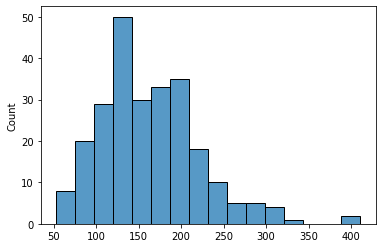

In [7]:
ss = OOIP.get_sample(size=250)

sns.histplot(ss)

In [8]:
ooip_df = OOIP.get_sample_df(size=10)
ooip_df

,area,height,bo,phi,sw,OOIP
0,1395.362303,224.652119,1.12,0.173223,0.449882,206.914413
1,1124.485447,212.032470,1.12,0.188533,0.326656,209.658185
2,1131.604717,208.270092,1.12,0.185628,0.331324,202.633975
3,976.990009,225.022994,1.12,0.286352,0.473130,229.748088
4,1342.446819,209.444458,1.12,0.202527,0.460344,212.861764
5,1115.615332,225.002048,1.12,0.208457,0.447478,200.261872
6,796.399311,233.545403,1.12,0.163840,0.498609,105.835203
7,1084.112669,237.294120,1.12,0.213918,0.369993,240.151921
8,1139.950418,234.305331,1.12,0.220758,0.349992,265.482093
9,921.154723,208.715469,1.12,0.245094,0.279995,235.010397


<AxesSubplot:xlabel='area', ylabel='Count'>

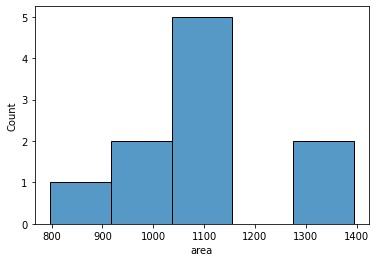

In [9]:
sns.histplot(ooip_df['area'])

In [11]:
OOIP.get_sample_df(ppf=np.linspace(0.05,0.95,10))

,area,height,bo,phi,sw,OOIP
0,671.029275,183.5,1.12,0.114206,0.235515,74.467510
1,792.713322,190.5,1.12,0.138543,0.296357,101.971547
2,865.102050,197.5,1.12,0.153020,0.332551,120.874204
3,922.935907,204.5,1.12,0.164587,0.361468,137.396387
4,974.867731,211.5,1.12,0.174974,0.387434,153.078147
5,1025.132269,218.5,1.12,0.185026,0.412566,168.638179
6,1077.064093,225.5,1.12,0.195413,0.438532,184.585622
7,1134.897950,232.5,1.12,0.206980,0.467449,201.465306
8,1207.286678,239.5,1.12,0.221457,0.503643,220.156546
9,1328.970725,246.5,1.12,0.245794,0.564485,242.906077
